<a href="https://colab.research.google.com/github/RainbowC0/colabtest/blob/main/torchir/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 在线运行

借助 Google Colaboritory（以下简称 Colab）在线环境运行测试用例，并使用免费的 T4 GPU（甚至 TPU）。

下面详细介绍使用教程。

## 选用 T4 GPU 环境

Colab 免费提供 CPU、T4 GPU 和 TPU 云环境，默认使用 CPU 环境。本程序需使用 GPU 计算，需要先选择 GPU 环境。

可以在菜单栏点击“代码执行程序”->“更改运行时类型”设定环境：

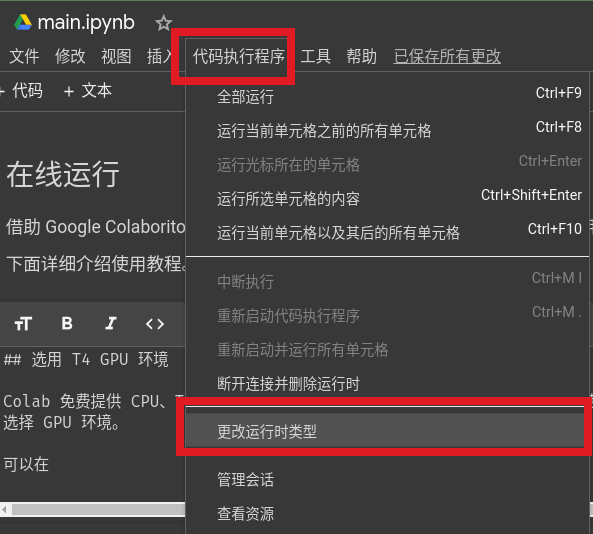

然后选择“T4 GPU”即可。

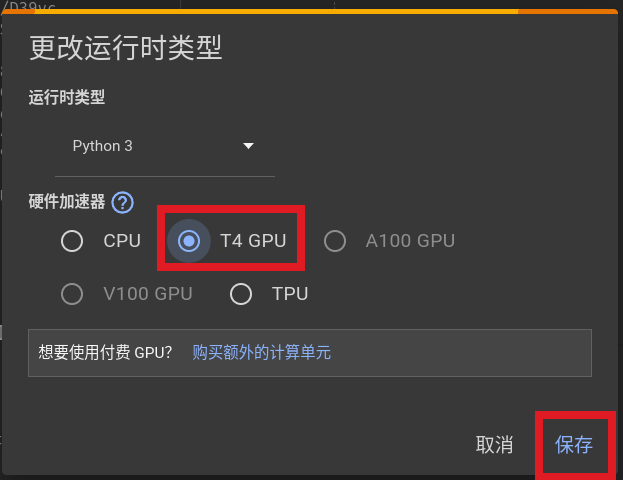

## 挂载谷歌硬盘

Colab 运行代码时会实现连接到一个云环境，并可以访问其文件系统，但是不能保存对文件的操作（即不能保存文件）。可以先挂载谷歌硬盘，这样 Colab 就可以直接在谷歌硬盘上进行文件操作，并保存修改。

运行以下代码挂载谷歌硬盘：

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## *下载源代码

挂在后可以在左侧边栏看到文件系统，这时可以从 Github 下载程序包并解压文件到硬盘：

（该代码用于下载程序，仅须运行一次。若已下载至谷歌硬盘可不运行。）

In [ ]:
%%bash
wget -c -k https://github.com/RainbowC0/pytorch-cifar/archive/refs/heads/master.zip
unzip master.zip -d /content/drive/MyDrive/
rm master.zip

## 运行程序

使用以下命令运行程序。这里将程序输出重定向至文件 a.out，运行结束后可以在侧边栏查看该文件。

**注意：运行过程中需保持在线状态，离线时间不能过长，否则 Colab 会自动断开与云平台的连接并释放资源。采用 T4 GPU 运行 VCG19 模型大概耗时 41 min，请耐心等待。如要检查进度，可以在侧边栏打开输出文件 a.out 查看输出记录。最终有 10000 多条输出记录。**

In [ ]:
import os

pth = '/content/drive/MyDrive/pytorch-cifar-master'
os.chdir(pth)
# 默认采用DLA模型，输出重定向至a.out文件，可事后查看
# 要更换模型可在左侧文件树中打开 main.py 文件，修改 net=SimpleDLA() 一行为其他模型
!python main.py > a.out

若上述代码执行成功，则会在 './fig' 目录下保存 CSV 数据。使用以下命令可视化数据：

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

net_name = 'DLA'

def draw_figure(net, tp):
  f = open('./fig/{net}_{tp}.csv', 'r')
  data = np.loadtxt(f, delimiter=',')
  f.close()

  plt.figure()
  plt.xlabel('epoch')
  plt.ylabel(tp)
  plt.plot(data[:,0], data[:,1], color='red', label='test')
  plt.plot(data[:,0], data[:,2], color='blue', label='train')
  plt.legend(loc='upper left')
  plt.title(net_name)
  plt.show()

draw_figure(net_name, 'acc')
draw_figure(net_name, 'loss')